# Import Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
data = pd.read_csv('K01_heart_disease.csv') #Membaca Data

In [4]:
data = data.dropna()
data.head(10)    #Pemanggilan Data                                  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [23]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [5]:
# Menampilkan informasi DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Mencetak nama-nama kolom
print (data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [7]:
# Preprocessing Data
from sklearn.preprocessing import LabelEncoder
for col in ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'] :
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [9]:
data.describe()       

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,25.510893,0.789760,0.781046,32.899782,81.640523,0.233115,0.989107,62.979303,0.404139,18.787582,1.361656,0.553377
std,9.432617,0.407701,0.956519,14.098608,58.742803,0.423046,0.631671,24.919644,0.490992,10.077647,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,22.000000,33.250000,0.000000,1.000000,46.000000,0.000000,10.000000,1.000000,0.000000
50%,26.000000,1.000000,0.000000,31.000000,81.000000,0.000000,1.000000,64.000000,0.000000,16.000000,1.000000,1.000000
75%,32.000000,1.000000,2.000000,41.000000,125.000000,0.000000,1.000000,82.000000,1.000000,25.000000,2.000000,1.000000
max,49.000000,1.000000,3.000000,66.000000,221.000000,1.000000,2.000000,118.000000,1.000000,52.000000,2.000000,1.000000


In [10]:
# Memisahkan kolom target (HeartDisease) dari dataset
x = data.drop(['HeartDisease'], axis = 1) 
y = data['HeartDisease']  

In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [12]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


# Splitting data 

In [13]:
# Splitting data
from sklearn.model_selection import train_test_split

In [14]:
# 80:20
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)

# Modelling Data

In [15]:
# Modelling Data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [16]:
# Melakukan testing model untuk Prediksi
hasil_prediksi = model.predict (x_test)

In [17]:
# Melakukan pengecekan untuk keakuratan hasil prediksi
from sklearn.metrics import accuracy_score
print ('Akurasi Model   : ', accuracy_score (y_test, hasil_prediksi)*100,('%'))

Akurasi Model   :  83.15217391304348 %


In [18]:
data_baru = ([[26,1,2,49,53,0,1,48,0,10,2]])  # Data baru yang akan diprediksi
hasil_prediksi_pasien = model.predict (data_baru)  
# Menggunakan model untuk melakukan prediksi pada data baru
print (f"Hasilnya Adalah ", hasil_prediksi_pasien)  # Menampilkan hasil prediksi

Hasilnya Adalah  [0]


C:\Users\Putra Ari Sandi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


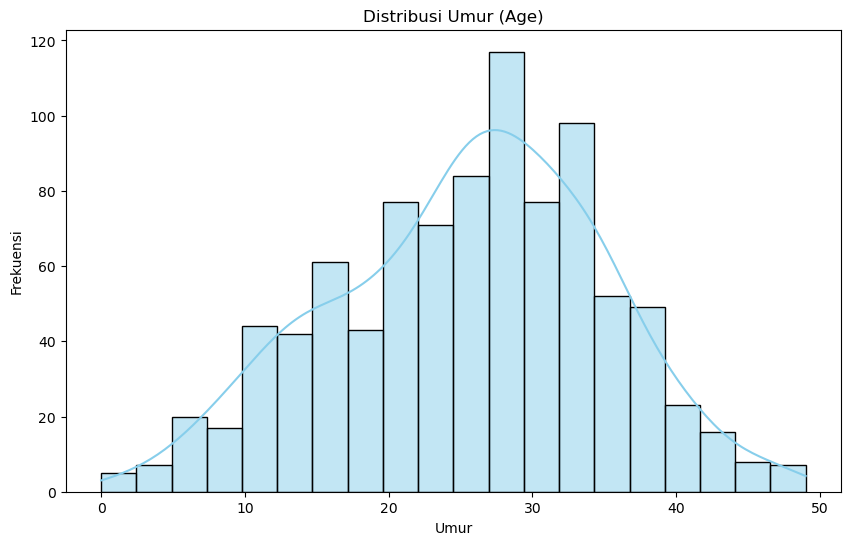

In [20]:
# Visualisasi distribusi umur (Age)
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

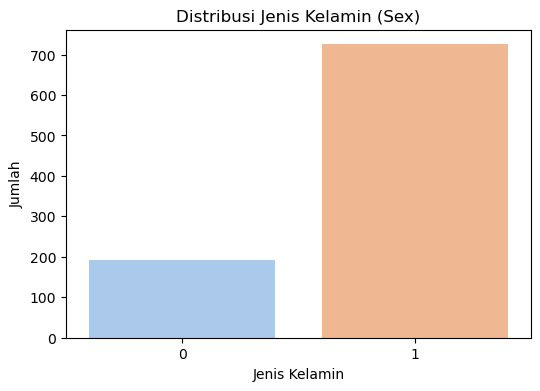

In [21]:
# Visualisasi kategori jenis kelamin (Sex)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Distribusi Jenis Kelamin (Sex)')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

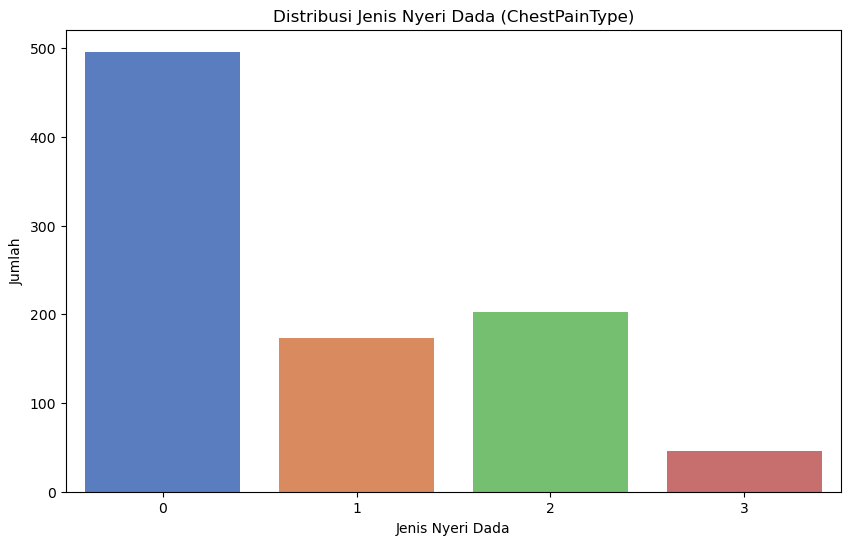

In [22]:
# Visualisasi kategori ChestPainType
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', data=data, palette='muted')
plt.title('Distribusi Jenis Nyeri Dada (ChestPainType)')
plt.xlabel('Jenis Nyeri Dada')
plt.ylabel('Jumlah')
plt.show()

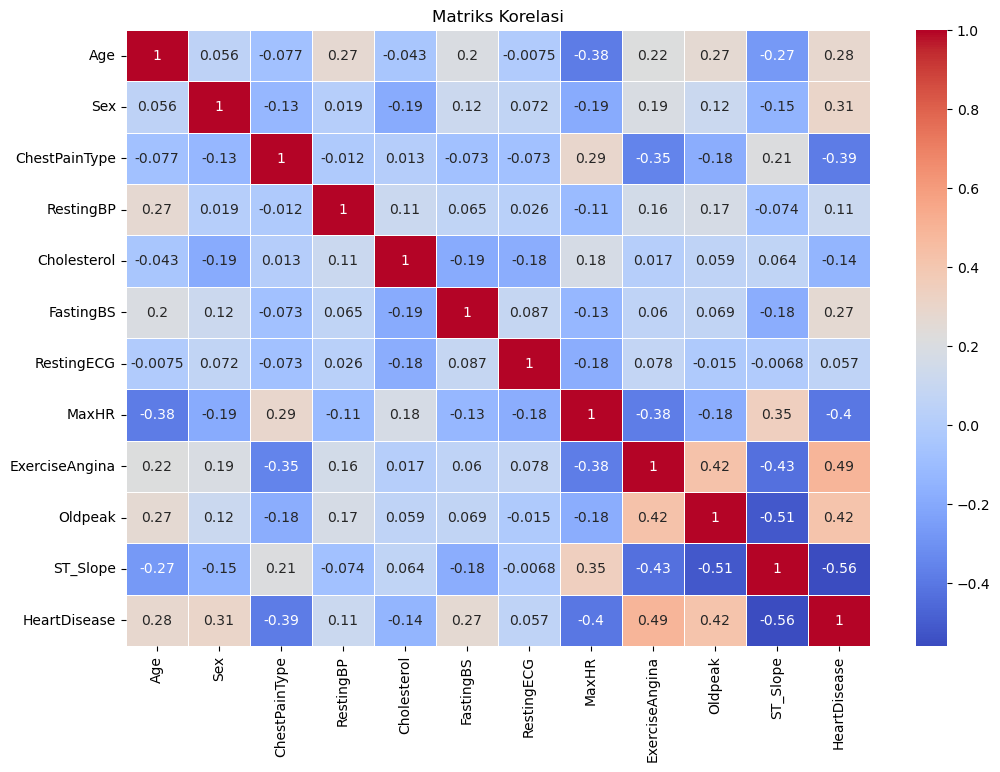

In [24]:
# Visualisasi matriks korelasi
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()


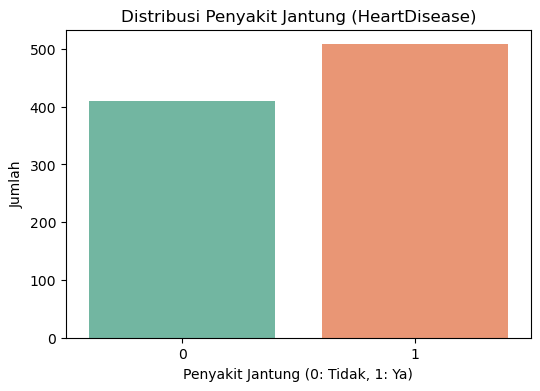

In [25]:
# Visualisasi kategori HeartDisease
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, palette='Set2')
plt.title('Distribusi Penyakit Jantung (HeartDisease)')
plt.xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()